In [ ]:
import keras
import numpy as np
import pandas as pd
import scipy.io as sio
from tcn import TCN,tcn_full_summary
from tensorflow.keras.layers import Dense,Input,LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
import time
from keras.models import Model
from tensorflow.keras.utils import to_categorical

In [ ]:
#Import data
input_train=sio.loadmat('LSTM_TCN_YPred0_60_1.3.mat')
output_train=sio.loadmat('a_train60_1.3.mat')
input_train=input_train['LSTM_TCN_YPred0_60_1.3.1']
output_train=output_train['a1']
input_test=sio.loadmat('LSTM_TCN_YPred_60_1.3.mat')
output_test=sio.loadmat('a_test60_1.3.mat')
input_test=input_test['TCN_LSTM_YPred']
output_test=output_test['a2']
output_train=np.transpose(output_train)
output_test=np.transpose(output_test)

In [ ]:
#Generate training set and test set
XTrain1=np.zeros((12060,60,1))
XTrain2=np.zeros((12060,60,1))
XTrain3=np.zeros((12060,60,1))
YTrain=np.zeros((12060,1))

for i in range(12060):
    XTrain1[i,:,0]=input_train[i,:]
    XTrain2[i,:,0]=input_train[i,:]
    XTrain3[i,:,0]=input_train[i,:]
    YTrain[i]=output_train[i]
XTest1=np.zeros((12000,60,1))
XTest2=np.zeros((12000,60,1))
XTest3=np.zeros((12000,60,1))
YTest=np.zeros((12000,1))
for i in range(12000):
    XTest1[i,:,0]=input_test[i,:]
    XTest2[i,:,0]=input_test[i,:]
    XTest3[i,:,0]=input_test[i,:]
    YTest[i]=output_test[i]

In [4]:
#Establish network model
input1 = Input(batch_shape=(None,60,1), name='input1')
input2 = Input(batch_shape=(None,60,1), name='input2')
input3=Input(batch_shape=(None,60), name='input3')
batch_size, time_steps, input_dim = None, 60, 1
tcn_layer1=TCN(input_shape=(time_steps, input_dim),nb_filters=64,
    kernel_size=3,dilations=[1,2,4])
x=tcn_layer1(input1)
x=Dense(60)(x)
y=LSTM(64, input_dim=1, input_length=60, return_sequences=True)(input2)
y=LSTM(64, input_dim=1, input_length=60, return_sequences=False)(y)
y=Dense(128,activation='relu')(y)
y=Dense(60)(y)

r=keras.layers.concatenate([x,y,input3])
r = Dense(64, activation='relu')(r)


output = Dense(1,activation='sigmoid',name='main_output')(r)
model = Model(inputs=[input1,input2,input3], outputs=[output])
def get_lr_metric(optimizer):  # printing the value of the learning rate
    def lr(y_true, y_pred):
        return optimizer.lr
    return lr
optimizer = keras.optimizers.Adam(lr=0.01)
lr_metric = get_lr_metric(optimizer)
model.compile(optimizer = optimizer,loss='binary_crossentropy', metrics = ['accuracy',lr_metric])

In [5]:
#Training network
from keras.callbacks import ReduceLROnPlateau
import keras.backend as K
from keras.callbacks import LearningRateScheduler
 
def scheduler(epoch):
    if epoch % 88 == 0 and epoch != 0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr * 0.2)
        print("lr changed to {}".format(lr * 0.2))
    return K.get_value(model.optimizer.lr)
 
reduce_lr = LearningRateScheduler(scheduler)
start=time.process_time()
history=model.fit([XTrain1,XTrain2,XTrain3], YTrain,batch_size=512,epochs=300, validation_split=0.2,callbacks=[reduce_lr])

Epoch 1/300
19/19 [==============================] - 12s 416ms/step - loss: 1.3108 - accuracy: 0.5501 - lr: 0.0100 - val_loss: 0.7539 - val_accuracy: 0.4436 - val_lr: 0.0100
Epoch 2/300
19/19 [==============================] - 7s 363ms/step - loss: 0.5286 - accuracy: 0.7574 - lr: 0.0100 - val_loss: 0.8507 - val_accuracy: 0.4436 - val_lr: 0.0100
Epoch 3/300
19/19 [==============================] - 7s 356ms/step - loss: 0.4709 - accuracy: 0.7757 - lr: 0.0100 - val_loss: 0.7739 - val_accuracy: 0.4436 - val_lr: 0.0100
Epoch 4/300
19/19 [==============================] - 7s 370ms/step - loss: 0.4690 - accuracy: 0.7837 - lr: 0.0100 - val_loss: 2.0536 - val_accuracy: 0.4436 - val_lr: 0.0100
Epoch 5/300
19/19 [==============================] - 7s 362ms/step - loss: 0.7518 - accuracy: 0.6934 - lr: 0.0100 - val_loss: 0.9733 - val_accuracy: 0.4436 - val_lr: 0.0100
Epoch 6/300
19/19 [==============================] - 6s 337ms/step - loss: 0.5749 - accuracy: 0.6886 - lr: 0.0100 - val_loss: 0.5400 -

Epoch 95/300
19/19 [==============================] - 8s 403ms/step - loss: 0.0665 - accuracy: 0.9703 - lr: 0.0020 - val_loss: 0.0734 - val_accuracy: 0.9772 - val_lr: 0.0020
Epoch 96/300
19/19 [==============================] - 6s 329ms/step - loss: 0.0607 - accuracy: 0.9745 - lr: 0.0020 - val_loss: 0.0730 - val_accuracy: 0.9772 - val_lr: 0.0020
Epoch 97/300
19/19 [==============================] - 6s 339ms/step - loss: 0.0632 - accuracy: 0.9733 - lr: 0.0020 - val_loss: 0.0814 - val_accuracy: 0.9735 - val_lr: 0.0020
Epoch 98/300
19/19 [==============================] - 6s 335ms/step - loss: 0.0667 - accuracy: 0.9732 - lr: 0.0020 - val_loss: 0.0795 - val_accuracy: 0.9743 - val_lr: 0.0020
Epoch 99/300
19/19 [==============================] - 8s 441ms/step - loss: 0.0737 - accuracy: 0.9677 - lr: 0.0020 - val_loss: 0.0698 - val_accuracy: 0.9780 - val_lr: 0.0020
Epoch 100/300
19/19 [==============================] - 6s 335ms/step - loss: 0.0623 - accuracy: 0.9735 - lr: 0.0020 - val_loss: 0.

Epoch 142/300
19/19 [==============================] - 6s 326ms/step - loss: 0.0683 - accuracy: 0.9708 - lr: 0.0020 - val_loss: 0.0707 - val_accuracy: 0.9764 - val_lr: 0.0020
Epoch 143/300
19/19 [==============================] - 6s 308ms/step - loss: 0.0592 - accuracy: 0.9733 - lr: 0.0020 - val_loss: 0.0731 - val_accuracy: 0.9776 - val_lr: 0.0020
Epoch 144/300
19/19 [==============================] - 6s 313ms/step - loss: 0.0678 - accuracy: 0.9719 - lr: 0.0020 - val_loss: 0.0740 - val_accuracy: 0.9772 - val_lr: 0.0020
Epoch 145/300
19/19 [==============================] - 6s 310ms/step - loss: 0.0646 - accuracy: 0.9719 - lr: 0.0020 - val_loss: 0.0681 - val_accuracy: 0.9789 - val_lr: 0.0020
Epoch 146/300
19/19 [==============================] - 7s 384ms/step - loss: 0.0717 - accuracy: 0.9704 - lr: 0.0020 - val_loss: 0.0648 - val_accuracy: 0.9801 - val_lr: 0.0020
Epoch 147/300
19/19 [==============================] - 6s 308ms/step - loss: 0.0620 - accuracy: 0.9746 - lr: 0.0020 - val_los

Epoch 233/300
19/19 [==============================] - 7s 350ms/step - loss: 0.0645 - accuracy: 0.9712 - lr: 4.0000e-04 - val_loss: 0.0627 - val_accuracy: 0.9789 - val_lr: 4.0000e-04
Epoch 234/300
19/19 [==============================] - 6s 321ms/step - loss: 0.0654 - accuracy: 0.9720 - lr: 4.0000e-04 - val_loss: 0.0646 - val_accuracy: 0.9805 - val_lr: 4.0000e-04
Epoch 235/300
19/19 [==============================] - 6s 332ms/step - loss: 0.0657 - accuracy: 0.9712 - lr: 4.0000e-04 - val_loss: 0.0640 - val_accuracy: 0.9805 - val_lr: 4.0000e-04
Epoch 236/300
19/19 [==============================] - 7s 391ms/step - loss: 0.0648 - accuracy: 0.9715 - lr: 4.0000e-04 - val_loss: 0.0678 - val_accuracy: 0.9789 - val_lr: 4.0000e-04
Epoch 237/300
19/19 [==============================] - 6s 316ms/step - loss: 0.0599 - accuracy: 0.9738 - lr: 4.0000e-04 - val_loss: 0.0688 - val_accuracy: 0.9764 - val_lr: 4.0000e-04
Epoch 238/300
19/19 [==============================] - 6s 311ms/step - loss: 0.0673 -

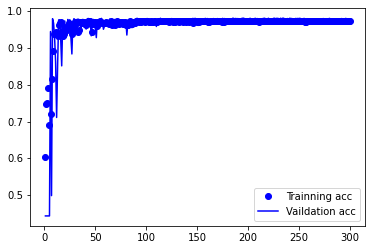

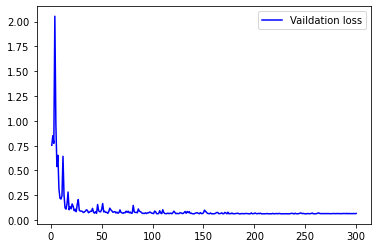

In [6]:
#Loss and accuracy
import matplotlib.pyplot as plt
acc = history.history['accuracy']    
val_acc = history.history['val_accuracy']   
loss = history.history['loss']         
val_loss = history.history['val_loss']  
epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Trainning acc')     
plt.plot(epochs,val_acc,'b',label='Vaildation acc') 
plt.legend()   
 
plt.figure()  

plt.plot(epochs,val_loss,'b',label='Vaildation loss')
plt.legend()  
 
plt.show() 

In [7]:
#Evaluate
model.evaluate([XTest1,XTest2,XTest3],YTest)

375/375 [==============================] - 4s 9ms/step - loss: 0.0641 - accuracy: 0.9722 - lr: 8.0000e-05


[0.06407643854618073, 0.9721666574478149, 8.000022353371605e-05]

In [24]:
#Predict
YPred=model.predict([XTest1,XTest2,XTest3])

In [28]:
#save data
from scipy.io import savemat
savemat('TCN_LSTM_class_loss.mat',{'TCN_LSTM_class_loss':val_loss})
savemat('TCN_LSTM_class_acc.mat',{'TCN_LSTM_class_acc':val_acc})
savemat('LSTM_TCN_class_YPred_60_1.3.mat',{'TCN_LSTM_YPred_class':YPred})